## **US presidents**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [7]:
# Import .csv file
# us_presidents = pd.read_csv('file_path/ThrowbackDataThursday Week 8 - US Presidents.csv')

In [8]:
us_presidents.shape

(45, 13)

In [9]:
us_presidents.head(3)

,index,Number,President,Colleges,Birth City,Birth State,Birth Date,Death City,Death State,Death Date,Left office,Took office,Party
0,0,1,George Washington,The College of William and Mary,Mount Vernon,VA,2/22/1732,Mount Vernon,VA,12/14/1799,3/4/1797,4/30/1789,Independent
1,1,2,John Adams,Harvard University,Quincy,MA,10/30/1735,Quincy,MA,7/4/1826,3/4/1801,3/4/1797,Federalist Party
2,2,3,Thomas Jefferson,The College of William and Mary,Shadwell,VA,4/13/1743,Charlottesville,VA,7/4/1826,3/4/1809,3/4/1801,Democratic - Republican Party


In [10]:
# Make "index" column the actual index
us_presidents = us_presidents.set_index('index')

In [11]:
us_presidents.tail(3)
# Donald Trump's data from his first term has not been updated
# Joe Biden's data is not included
# Donald Trump's data from his second term has not been updated

,Number,President,Colleges,Birth City,Birth State,Birth Date,Death City,Death State,Death Date,Left office,Took office,Party
index,,,,,,,,,,,,
42,43,George W. Bush,"Harvard University, Yale University",New Haven,CT,7/6/1946,NaN,NaN,NaN,1/20/2009,1/20/2001,Republican Party
43,44,Barack Obama,"Columbia University, Harvard University, Occid...",Honolulu,HI,8/4/1961,NaN,NaN,NaN,1/20/2017,1/20/2009,Democratic Party
44,45,Donald J. Trump,University of Pennsylvania,New York,NY,6/14/1946,NaN,NaN,NaN,NaN,1/20/2017,Republican Party


In [12]:
# Update Donald Trump's data from his first term
us_presidents.loc[44,'Left office'] = '01/20/2021'

In [13]:
# Get column names to use for adding Joe Biden's data
us_presidents.columns

Index(['Number', 'President', 'Colleges', 'Birth City', 'Birth State',
       'Birth Date', 'Death City', 'Death State', 'Death Date', 'Left office',
       'Took office', 'Party'],
      dtype='object')

In [14]:
# Make a data frame with Joe Biden's data
biden_df = pd.DataFrame({'Number':[46], 'President':['Joe Biden'], 'Colleges':['University of Delaware, Syracuse Law School'], 'Birth City':['Scranton'], 'Birth State':['PA'], 'Birth Date':['11/20/1942'], 'Death City':[''], 'Death State':[''], 'Death Date':[''], 'Left office':['01/20/2025'], 'Took office':['01/20/2021'], 'Party':['Democratic Party']})
# Note that if your data frame has one row, you have to declare an index column or make all values lists, as above.

In [15]:
# Add Joe Biden's data frame to us_presidents
us_presidents = pd.concat([us_presidents, biden_df], ignore_index=True)

In [16]:
# Turn Joe Biden's missing values into ones that Python interpretes as such
us_presidents.loc[45, ['Death City', 'Death State', 'Death Date']] = np.nan

In [17]:
# Update Donald Trump's data from his second term
trump2_df = pd.DataFrame(us_presidents.loc[44,]) # make a copy of his data from the first term since a lot of it remained the same
trump2_df.shape
# note that the shape of the data frame is not appropriate for updating us_presidents

(12, 1)

In [18]:
# transpose / change shape of trump2_df
trump2_df = trump2_df.T
trump2_df.shape

(1, 12)

In [19]:
# Add trump2_df to us_presidents
us_presidents = pd.concat([us_presidents, trump2_df], ignore_index=True)

In [20]:
# Update Donald Trump's data from his second term
us_presidents.loc[46,['Number', 'Left office', 'Took office']] = [47, np.nan, '1/20/2025']

In [21]:
us_presidents.info()
# all dates are strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Number       47 non-null     object
 1   President    47 non-null     object
 2   Colleges     47 non-null     object
 3   Birth City   47 non-null     object
 4   Birth State  47 non-null     object
 5   Birth Date   47 non-null     object
 6   Death City   40 non-null     object
 7   Death State  40 non-null     object
 8   Death Date   40 non-null     object
 9   Left office  46 non-null     object
 10  Took office  47 non-null     object
 11  Party        47 non-null     object
dtypes: object(12)
memory usage: 4.5+ KB


In [22]:
for column in us_presidents.columns:
    null_count = us_presidents[column].isnull().sum()
    print(f'There are {null_count} null values in the {column} column')
# a few presidents don't have death information because they are still living.
# the current president does not have a "Left office" date


There are 0 null values in the Number column
There are 0 null values in the President column
There are 0 null values in the Colleges column
There are 0 null values in the Birth City column
There are 0 null values in the Birth State column
There are 0 null values in the Birth Date column
There are 7 null values in the Death City column
There are 7 null values in the Death State column
There are 7 null values in the Death Date column
There are 1 null values in the Left office column
There are 0 null values in the Took office column
There are 0 null values in the Party column


In [23]:
living_presidents = us_presidents[us_presidents['Death Date'].isnull()]
living_presidents
# Jimmy Carter has since died

,Number,President,Colleges,Birth City,Birth State,Birth Date,Death City,Death State,Death Date,Left office,Took office,Party
38,39,Jimmy Carter,"Georgia Institute of Technology, Georgia South...",Plains,GA,10/1/1924,NaN,NaN,NaN,1/20/1981,1/20/1977,Democratic Party
41,42,Bill Clinton,"Georgetown University, University of Oxford, Y...",Hope,AR,8/19/1946,NaN,NaN,NaN,1/20/2001,1/20/1993,Democratic Party
42,43,George W. Bush,"Harvard University, Yale University",New Haven,CT,7/6/1946,NaN,NaN,NaN,1/20/2009,1/20/2001,Republican Party
43,44,Barack Obama,"Columbia University, Harvard University, Occid...",Honolulu,HI,8/4/1961,NaN,NaN,NaN,1/20/2017,1/20/2009,Democratic Party
44,45,Donald J. Trump,University of Pennsylvania,New York,NY,6/14/1946,NaN,NaN,NaN,01/20/2021,1/20/2017,Republican Party
45,46,Joe Biden,"University of Delaware, Syracuse Law School",Scranton,PA,11/20/1942,NaN,NaN,NaN,01/20/2025,01/20/2021,Democratic Party
46,47,Donald J. Trump,University of Pennsylvania,New York,NY,6/14/1946,NaN,NaN,NaN,NaN,1/20/2025,Republican Party


In [24]:
# Update data frame with Jimmy Carter's death information
us_presidents.loc[us_presidents['President'] == 'Jimmy Carter', 'Death Date'] = '12/29/2024'
print('Jimmy Carter\'s death date has been updated')
us_presidents.loc[us_presidents['President'] == 'Jimmy Carter', 'Death City'] = 'Plains'
print('Jimmy Carter\'s death city has been updated')
us_presidents.loc[us_presidents['President'] == 'Jimmy Carter', 'Death State'] = 'GA'
print('Jimmy Carter\'s death state has been updated')
# we use .loc to select a row first because Python needs just one True or False value to make the required replacement

Jimmy Carter's death date has been updated
Jimmy Carter's death city has been updated
Jimmy Carter's death state has been updated


In [25]:
def date_from_str(date_str):
    '''Convert a date string to a date object.
    '''
    if pd.isnull(date_str):
        return None
    else:
        date_list = date_str.split('/')
        date_date = date(int(date_list[2]), int(date_list[0]), int(date_list[1]))
        return date_date

In [26]:
date_columns = ('Birth Date','Death Date','Left office', 'Took office')

In [27]:
# use date_from_str() to convert date strings in date columns to date format
for column in date_columns:
    column_list = column.split(' ')
    new_column_name = str(column_list[0].lower()) + '_' + str(column_list[1].lower()) + '_date'
    us_presidents[new_column_name] = us_presidents[column].apply(date_from_str)

In [28]:
us_presidents.head(3)

,Number,President,Colleges,Birth City,Birth State,Birth Date,Death City,Death State,Death Date,Left office,Took office,Party,birth_date_date,death_date_date,left_office_date,took_office_date
0,1,George Washington,The College of William and Mary,Mount Vernon,VA,2/22/1732,Mount Vernon,VA,12/14/1799,3/4/1797,4/30/1789,Independent,1732-02-22,1799-12-14,1797-03-04,1789-04-30
1,2,John Adams,Harvard University,Quincy,MA,10/30/1735,Quincy,MA,7/4/1826,3/4/1801,3/4/1797,Federalist Party,1735-10-30,1826-07-04,1801-03-04,1797-03-04
2,3,Thomas Jefferson,The College of William and Mary,Shadwell,VA,4/13/1743,Charlottesville,VA,7/4/1826,3/4/1809,3/4/1801,Democratic - Republican Party,1743-04-13,1826-07-04,1809-03-04,1801-03-04


In [29]:
us_presidents[us_presidents['President'] == 'Jimmy Carter']

,Number,President,Colleges,Birth City,Birth State,Birth Date,Death City,Death State,Death Date,Left office,Took office,Party,birth_date_date,death_date_date,left_office_date,took_office_date
38,39,Jimmy Carter,"Georgia Institute of Technology, Georgia South...",Plains,GA,10/1/1924,Plains,GA,12/29/2024,1/20/1981,1/20/1977,Democratic Party,1924-10-01,2024-12-29,1981-01-20,1977-01-20


In [30]:
# calculate age at inauguration in datetime.timedelta format
us_presidents['age_inauguration'] = us_presidents['took_office_date'] - us_presidents['birth_date_date']

In [31]:
def date_diff_days(duration):
    '''Convert datetime.timedelta to number of days.
    '''
    if pd.isnull(duration):
        return None
    else:
        return duration.days

In [32]:
# use date_diff_days() to create new column containing age at inauguration in days
us_presidents['age_inauguration_days'] = us_presidents['age_inauguration'].apply(date_diff_days)

In [33]:
def age_complete_years(age_days):
    '''Convert number of days to number of completed years.
    '''
    if pd.isnull(age_days):
        return None
    else:
        return int(age_days/365.25)

In [34]:
# use age_complete_years() to create new column containing age at inauguration in complete years
us_presidents['age_inauguration_years'] = us_presidents['age_inauguration_days'].apply(age_complete_years)

In [35]:
us_presidents.head(3)

,Number,President,Colleges,Birth City,Birth State,Birth Date,Death City,Death State,Death Date,Left office,Took office,Party,birth_date_date,death_date_date,left_office_date,took_office_date,age_inauguration,age_inauguration_days,age_inauguration_years
0,1,George Washington,The College of William and Mary,Mount Vernon,VA,2/22/1732,Mount Vernon,VA,12/14/1799,3/4/1797,4/30/1789,Independent,1732-02-22,1799-12-14,1797-03-04,1789-04-30,"20887 days, 0:00:00",20887,57
1,2,John Adams,Harvard University,Quincy,MA,10/30/1735,Quincy,MA,7/4/1826,3/4/1801,3/4/1797,Federalist Party,1735-10-30,1826-07-04,1801-03-04,1797-03-04,"22406 days, 0:00:00",22406,61
2,3,Thomas Jefferson,The College of William and Mary,Shadwell,VA,4/13/1743,Charlottesville,VA,7/4/1826,3/4/1809,3/4/1801,Democratic - Republican Party,1743-04-13,1826-07-04,1809-03-04,1801-03-04,"21144 days, 0:00:00",21144,57


# A Line Graph

Text(0, 0.5, 'Age at inauguration (years)')

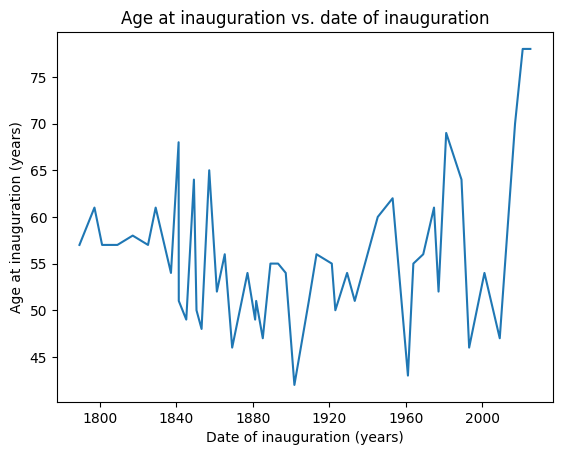

In [36]:
# age at inauguration with time
age = us_presidents['age_inauguration_years']
time = us_presidents['took_office_date']
plt.plot(time, age)
plt.title('Age at inauguration vs. date of inauguration')
plt.xlabel('Date of inauguration (years)')
plt.ylabel('Age at inauguration (years)')

In [37]:
oldest_president_at_inauguration = us_presidents[us_presidents['age_inauguration_days'] == us_presidents['age_inauguration_days'].max()]
# print(oldest_president_at_inauguration)
print(f'The oldest president at inauguration was {oldest_president_at_inauguration['President'].values[0]} at {oldest_president_at_inauguration['age_inauguration_years'].values[0]} years {oldest_president_at_inauguration['age_inauguration_days'].values[0] % 365.25} days')
youngest_president_at_inauguration = us_presidents[us_presidents['age_inauguration_days'] == us_presidents['age_inauguration_days'].min()]
# print(youngest_president_at_inauguration)
print(f'The youngest president at inauguration was {youngest_president_at_inauguration['President'].values[0]} at {youngest_president_at_inauguration['age_inauguration_years'].values[0]} years {youngest_president_at_inauguration['age_inauguration_days'].values[0] % 365.25} days old')

The oldest president at inauguration was Donald J. Trump at 78 years 220.5 days
The youngest president at inauguration was Theodore Roosevelt at 42 years 321.5 days old


(0.0, 80.0)

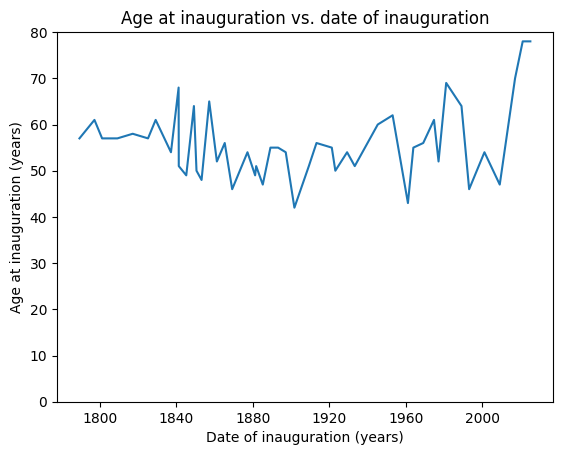

In [38]:
# Make y axis start at zero
plt.plot(time, age)
plt.title('Age at inauguration vs. date of inauguration')
plt.xlabel('Date of inauguration (years)')
plt.ylabel('Age at inauguration (years)')
plt.ylim(0,80)

(0.0, 80.0)

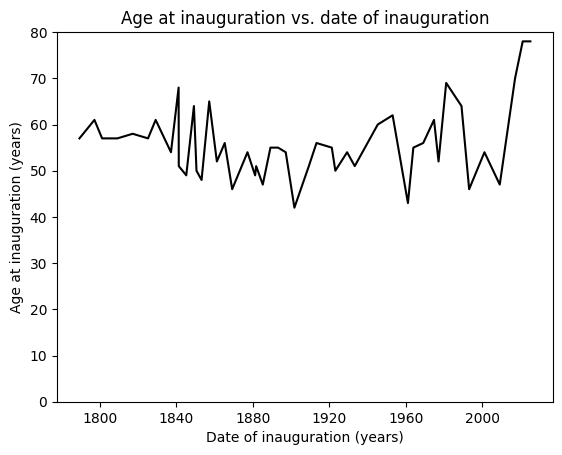

In [39]:
# make line colour black
plt.plot(time, age, 'k')
plt.title('Age at inauguration vs. date of inauguration')
plt.xlabel('Date of inauguration (years)')
plt.ylabel('Age at inauguration (years)')
plt.ylim(0,80)

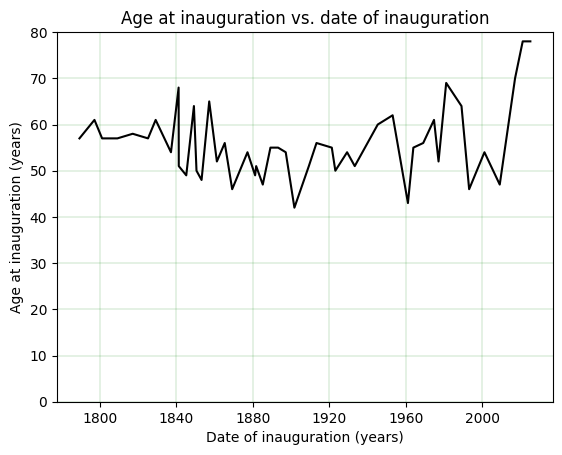

In [40]:
# Add grid for easier readability
plt.plot(time, age, 'k')
plt.title('Age at inauguration vs. date of inauguration')
plt.xlabel('Date of inauguration (years)')
plt.ylabel('Age at inauguration (years)')
plt.ylim(0,80)
plt.grid(color = 'g', linestyle = '-', linewidth = 0.15)

In [41]:
# Separate lines by party
# Make x and y axes for each party
us_presidents_republicans = us_presidents[us_presidents['Party'] == 'Republican Party']
age_republicans = us_presidents_republicans['age_inauguration_years']
time_republicans = us_presidents_republicans['took_office_date']
us_presidents_democrats = us_presidents[us_presidents['Party'] == 'Democratic Party']
age_democrats = us_presidents_democrats['age_inauguration_years']
time_democrats = us_presidents_democrats['took_office_date']

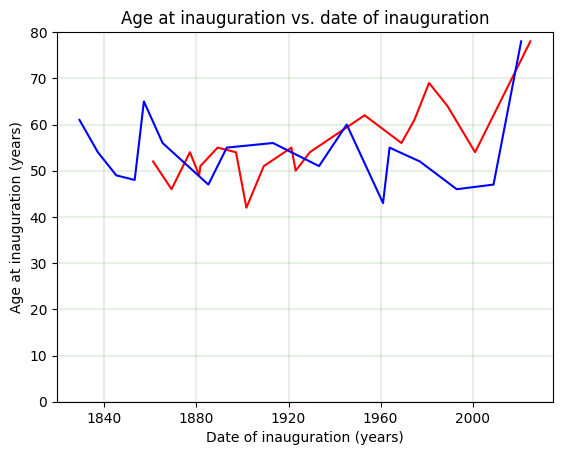

In [42]:
# Use party axes to plot two line graphs in the same plotting area
plt.plot(time_republicans, age_republicans, 'r')
plt.plot(time_democrats, age_democrats, 'b')
plt.title('Age at inauguration vs. date of inauguration')
plt.xlabel('Date of inauguration (years)')
plt.ylabel('Age at inauguration (years)')
plt.ylim(0,80)
plt.grid(color = 'g', linestyle = '-', linewidth = 0.15)

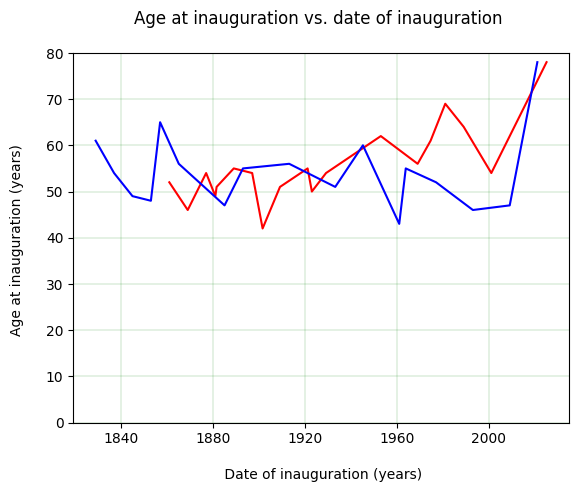

In [43]:
# Add spaces between title and axis labels and plotting area
plt.plot(time_republicans, age_republicans, '-r')
plt.plot(time_democrats, age_democrats, '-b')
plt.title('Age at inauguration vs. date of inauguration \n')
plt.xlabel('\n Date of inauguration (years)')
plt.ylabel('Age at inauguration (years) \n')
plt.ylim(0,80)
plt.grid(color = 'g', linestyle = '-', linewidth = 0.15)

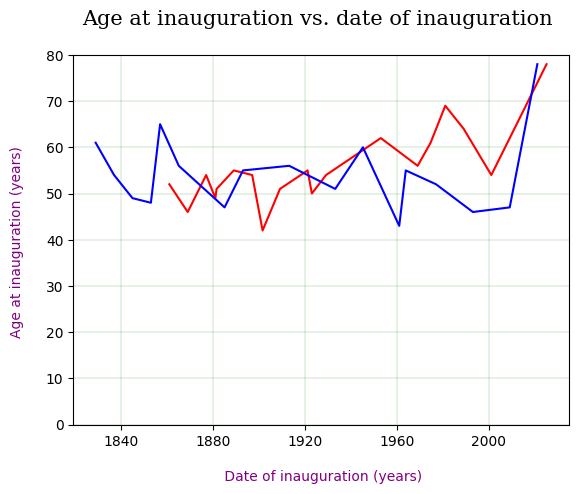

In [44]:
# Change title and axis label fonts
font1 = {'family':'serif','color':'k','size':15}
font2 = {'family':'sans serif','color':'purple','size':10}
plt.plot(time_republicans, age_republicans, 'r')
plt.plot(time_democrats, age_democrats, 'b')
plt.title('Age at inauguration vs. date of inauguration \n', fontdict = font1)
plt.xlabel('\n Date of inauguration (years)', fontdict = font2)
plt.ylabel('Age at inauguration (years) \n', fontdict = font2)
plt.ylim(0,80)
plt.grid(color = 'g', linestyle = '-', linewidth = 0.15)